# Task-3: Clustering with K-Means
### Apply the K-Means clustering algorithm to a dataset (e.g., Iris dataset or customer segmentation data) and visualize the clusters using matplotlib or seaborn.

## Import Libraries :
First, we import the necessary libraries for data manipulation, clustering, and visualization. These include pandas for data handling, scikit-learn for machine learning tasks, and matplotlib for plotting.

In [21]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Load Dataset :
We load the Iris dataset from scikit-learn. This dataset contains measurements of iris flowers from three different species and is commonly used for clustering and classification tasks.

In [22]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Create DataFrame :
We create a pandas DataFrame from the dataset for easier manipulation and visualization. We also extract the feature names and target names for reference.

In [23]:
class_names = iris.target_names
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
col = iris.feature_names
col

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
df = pd.DataFrame(data=iris.data,columns=col)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Preprocess Data :
We assign the features to 'X' and then 'standardize' them using StandardScaler. Standardizing the features ensures that they all have a mean of 0 and a standard deviation of 1, which is important for K-Means clustering.

In [26]:
X = iris.data  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Clustering :
We initialize the K-Means clustering model with 3 clusters (since there are 3 species of iris in the dataset) and a random state for reproducibility.

In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

## Train Model :
We fit the K-Means model to the standardized data. This step involves finding the cluster centers and assigning each data point to the nearest cluster.

In [28]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

## Make Predictions :
Using the trained model, we predict the cluster labels for each data point. These labels indicate which cluster each data point belongs to.

In [29]:
y_kmeans = kmeans.predict(X_scaled)
y_kmeans

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Visualize Clusters :
We visualize the clusters using a scatter plot. Each point is colored according to its cluster label, and the cluster centers are marked with red dots.

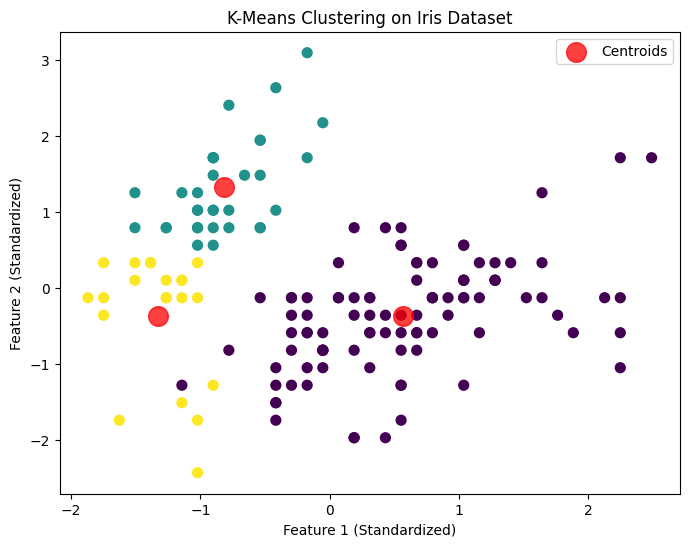

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids')

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

## Conclusion :
### In this project, I successfully applied the K-Means clustering algorithm to the Iris dataset. I standardized the features, trained the K-Means model, and visualized the resulting clusters.